EJEMPLO: KMEANS Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



X_train = pd.read_csv('../Samples/Clean/Feature_Selection/X_train.csv')
X_test = pd.read_csv('../Samples/Clean/Feature_Selection/X_test.csv')
y_train = pd.read_csv('../Samples/Clean/Feature_Selection/y_train.csv')
y_test = pd.read_csv('../Samples/Clean/Feature_Selection/y_test.csv')
n_clusters = 87

# Crear el modelo de clustering aglomerativo
model = KMeans(n_clusters=n_clusters, random_state=42)
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

----------------

In [2]:
# Fit the model on training data
model.fit(X_train_array)

# Predict clusters for training and test data
y_predict_train = model.predict(X_train_array)
y_predict_test = model.predict(X_test_array)

# Obtener los valores de "Glon" y "Glat"
X_train_glon_glat = X_train[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]
X_test_glon_glat = X_test[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]


In [11]:
y_test.columns

Index(['Cluster'], dtype='object')

Investigacion por densidades

--------- 

In [38]:
# Contar la frecuencia de los valores en y_test y y_predict_test
y_test_freq = y_test['Cluster'].value_counts().reset_index().rename(columns={'Cluster': 'value', 'count': 'frequency'}).sort_values(by='frequency', ascending=False)
y_predict_test_freq = pd.Series(y_predict_test).value_counts().reset_index().rename(columns={'index': 'value', 'count': 'frequency'}).sort_values(by='frequency', ascending=False)

# Crear subsets de X_train basados en los valores más frecuentes de y_test y y_predict_test
X_train_y_test_subsets = []
X_train_y_predict_test_subsets = []

In [43]:
import pandas as pd
import numpy as np

def create_subsets(y_predict_test_freq: pd.Series, X_data: pd.DataFrame, y_predict_test: np.ndarray, num_clusters_per_subset: int):
    subsets = []
    num_clusters = len(y_predict_test_freq)
    for i in range(0, num_clusters, num_clusters_per_subset):
        subset_indices = []
        for j in range(num_clusters_per_subset):
            if i + j < num_clusters:
                value = y_predict_test_freq.iloc[i + j]
                subset_indices.extend(np.where(y_predict_test == value)[0])
        subsets.append(X_data.iloc[subset_indices])
    return subsets

# Crear subconjuntos basados en los valores más frecuentes de y_test
X_train_y_test_subsets = create_subsets(y_test_freq['value'], X_test, y_test.to_numpy().ravel(), 10)

# Crear subconjuntos basados en los valores más frecuentes de y_predict_test
X_train_y_predict_test_subsets = create_subsets(y_predict_test_freq['value'], X_test, y_predict_test, 10)


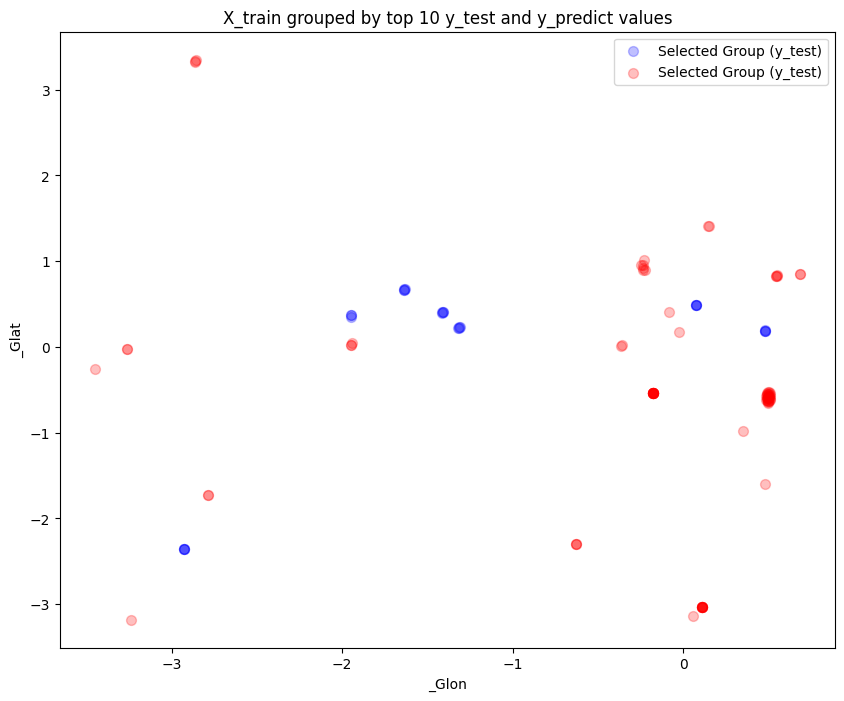

In [53]:
import matplotlib.pyplot as plt

def plot_groups(subsets_test:list[pd.DataFrame], subsets_predict:list[pd.DataFrame], subset_index:int, title:str):
    plt.figure(figsize=(10, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Colores para los grupos
    
     # Pintar el subconjunto seleccionado de y_test
    if subset_index < len(subsets_test):
        selected_subset = subsets_test[subset_index]
        color = 'b'  # Usar color azul para el subconjunto seleccionado de y_test
        plt.scatter(selected_subset['_Glon'], selected_subset['_Glat'], label=f'Selected Group (y_test)', s=50, c=color,alpha=0.25)
    
    if subset_index < len(subsets_predict):
        selected_subset = subsets_predict[subset_index]
        color = 'r'  # Usar color azul para el subconjunto seleccionado de y_test
        plt.scatter(selected_subset['_Glon'], selected_subset['_Glat'], label=f'Selected Group (y_test)', s=50, c=color,alpha=0.25)
    
    
    plt.xlabel('_Glon')
    plt.ylabel('_Glat')
    plt.title(title)
    plt.legend()
    plt.show()

# Llamar a la función para pintar los grupos
plot_groups(X_train_y_test_subsets, X_train_y_predict_test_subsets, 8, 'X_train grouped by top 10 y_test and y_predict values')


Hasta aqui la investigacion por densidades

--------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


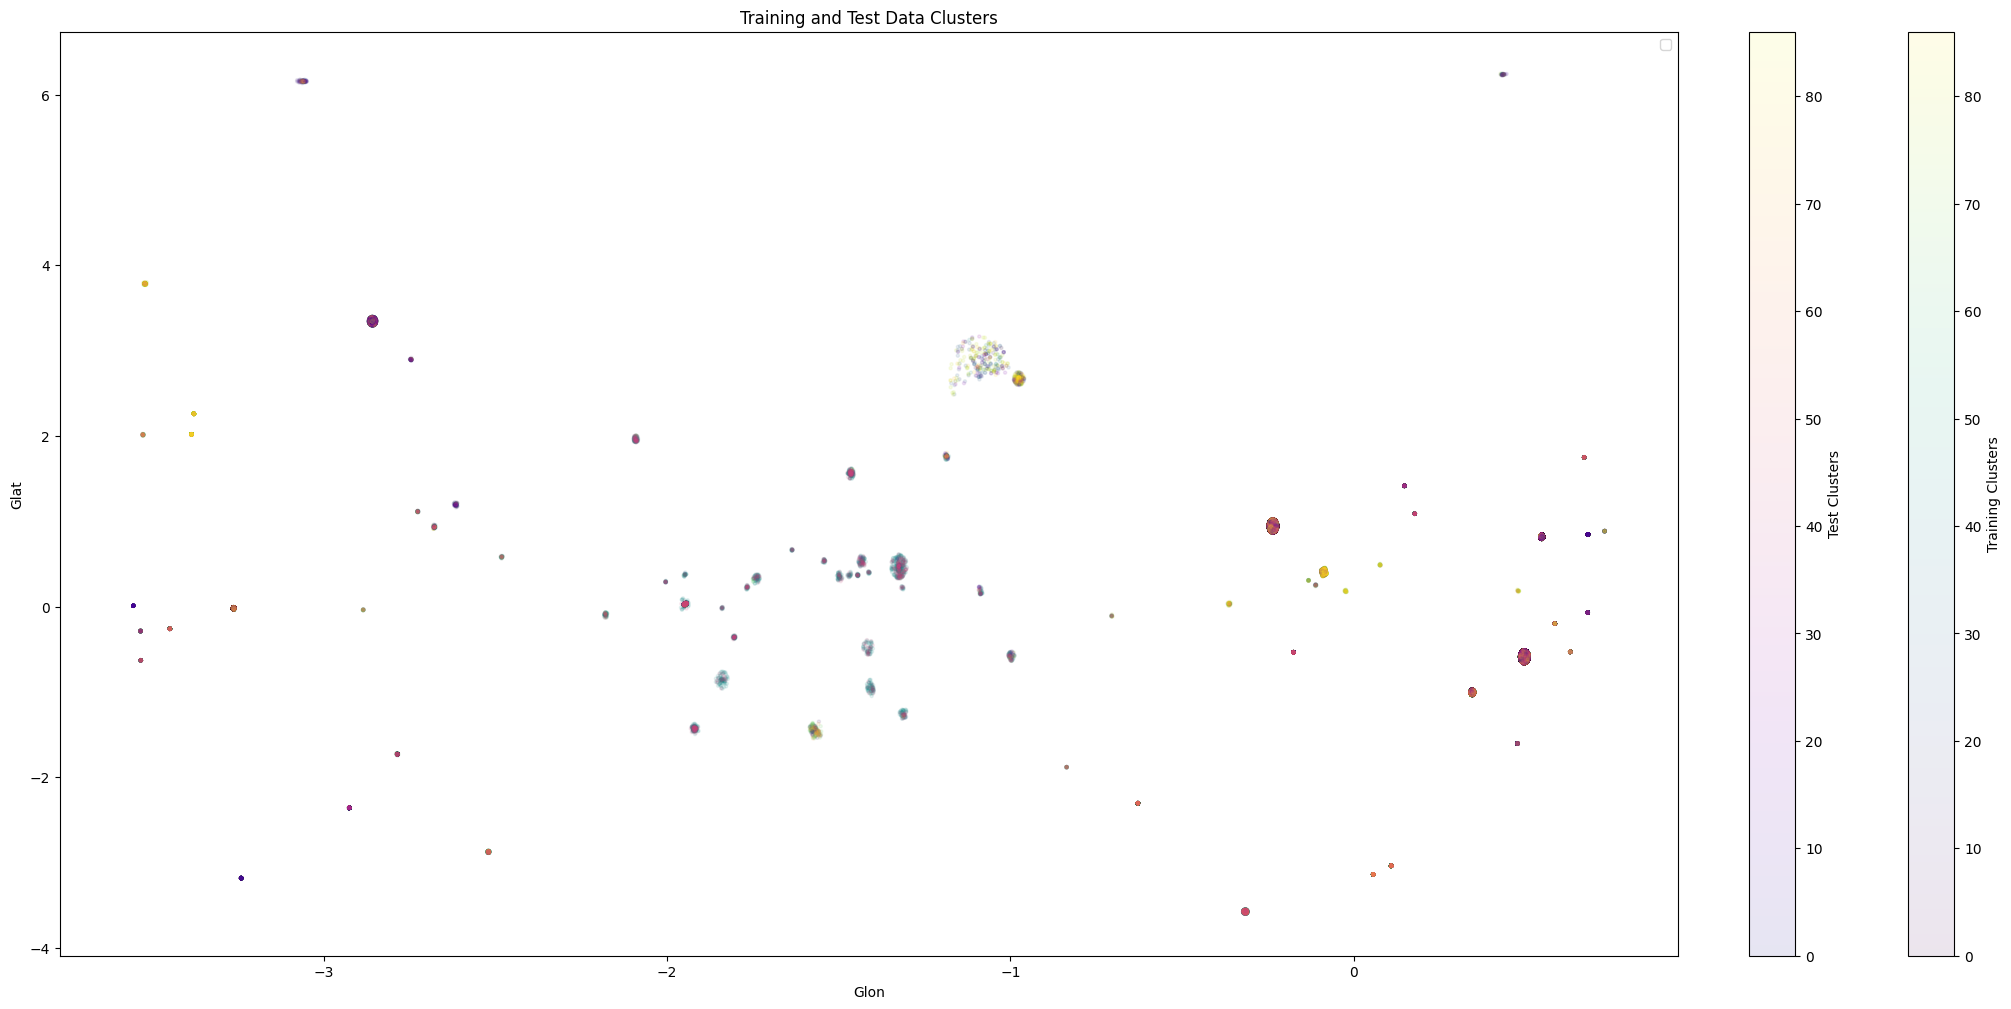

Within-cluster sum of squares (inertia) for training data: 3999650.2478192453


In [35]:
# Plotear los clusters para los datos de entrenamiento
plt.figure(figsize=(25, 12))

scatter1 = plt.scatter(X_train_glon_glat['_Glon'], X_train_glon_glat['_Glat'], c=y_predict_train, cmap='viridis', s=5,alpha=0.1)
# Añadir la barra de color para los datos de entrenamiento
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('Training Clusters')

# Plotear los clusters para los datos de prueba

scatter2 = plt.scatter(X_test_glon_glat['_Glon'], X_test_glon_glat['_Glat'], c=y_predict_test, cmap='plasma', s=5,alpha=0.1)
# Añadir la barra de color para los datos de prueba
cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('Test Clusters')

# Añadir etiquetas y título
plt.title('Training and Test Data Clusters')
plt.xlabel('Glon')
plt.ylabel('Glat')

# Mostrar la leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

# Evaluate clustering performance using inertia
train_inertia = model.inertia_
print(f'Within-cluster sum of squares (inertia) for training data: {train_inertia}')


-----------

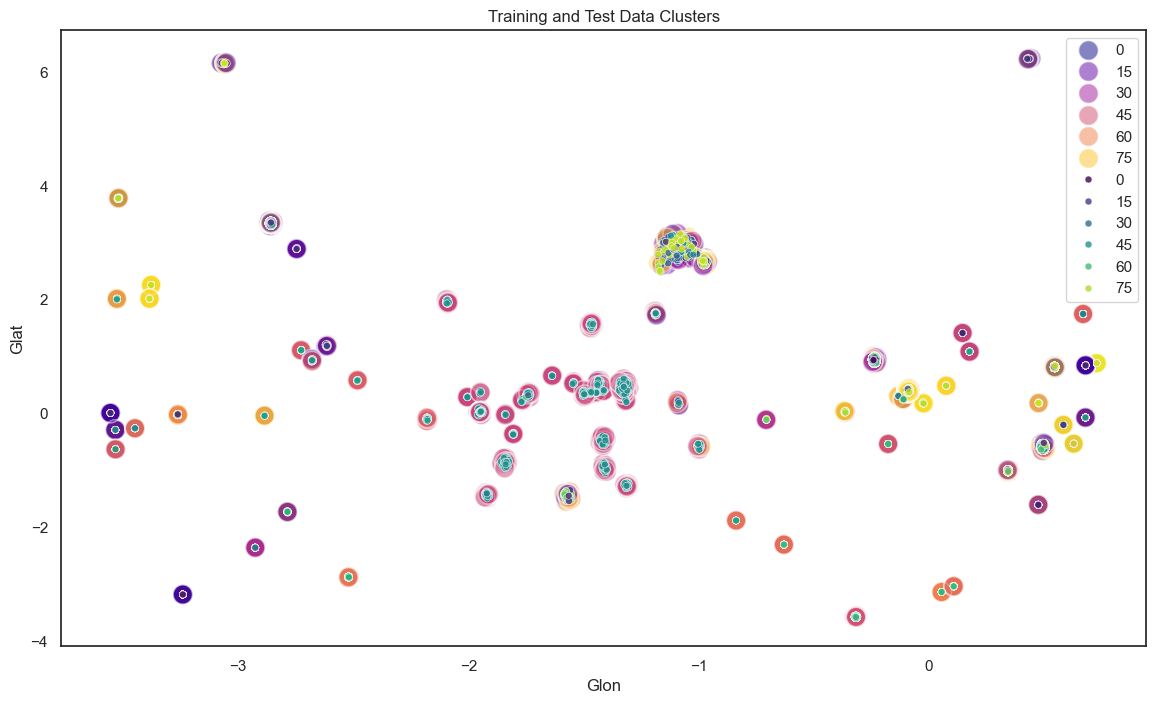

Within-cluster sum of squares (inertia) for training data: 3999650.247819245


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tema de seaborn
sns.set_theme(style="white")

# Añadir las etiquetas de cluster al dataframe
X_train_glon_glat.loc[:, 'Cluster'] = y_predict_train
X_test_glon_glat.loc[:, 'Cluster'] = y_predict_test

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Plotear los clusters para los datos de prueba
sns.scatterplot(x='_Glon', y='_Glat', hue='Cluster', data=X_test_glon_glat,palette='plasma', alpha=0.5, s=200)

# Plotear los clusters para los datos de entrenamiento
sns.scatterplot(x='_Glon', y='_Glat', hue='Cluster', data=X_train_glon_glat,palette='viridis', alpha=0.8, s=25)


# Añadir etiquetas y título
plt.title('Training and Test Data Clusters')
plt.xlabel('Glon')
plt.ylabel('Glat')

# Mostrar la leyenda
plt.legend(labels=['Training Data', 'Test Data'], loc='upper right')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

# Evaluar el rendimiento del clustering usando inertia
train_inertia = model.inertia_
print(f'Within-cluster sum of squares (inertia) for training data: {train_inertia}')

----------

In [ ]:
#densidad de cluster y_test
#densidad de cluster y_predict_test

cuantas estrellas tiene cada grupo, append de las dos y, real y predicha

In [37]:
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

# y_true son las etiquetas verdaderas de tus datos
# y_pred son las etiquetas predichas por tu modelo K-means

# Completeness Score
completeness = completeness_score(y_test.Cluster, y_predict_test)
homogeneity = homogeneity_score(y_test.Cluster, y_predict_test)

# V-measure Score (media armónica entre homogeneidad y completitud)
v_measure = v_measure_score(y_test.Cluster, y_predict_test)
print(v_measure,homogeneity,completeness)

0.48428087359132266 0.9262104394381987 0.327850950200869


In [47]:
from sklearn.metrics import calinski_harabasz_score

# Calcular el índice Davies-Bouldin
calinski_harabasz_score_100 = calinski_harabasz_score(X_test, y_test)
calinski_harabasz_score = calinski_harabasz_score(X_test, y_predict_test)

print("calinski_harabasz_score Index:", calinski_harabasz_score)

print("calinski_harabasz_score_100 Index:", calinski_harabasz_score_100)
print("%:"+str(round(((calinski_harabasz_score*100)/(calinski_harabasz_score_100)),2)))

C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


calinski_harabasz_score Index: 5962.535079171549
calinski_harabasz_score_100 Index: 1395.4787005188668
%:427.28


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calcular el índice Davies-Bouldin
davies_bouldin_100 = davies_bouldin_score(X_test, y_test)
davies_bouldin = davies_bouldin_score(X_test, y_predict_test)

print("Davies-Bouldin Index:", davies_bouldin)
print("%:"+str(round(((davies_bouldin*100)/(davies_bouldin_100)),2)))

In [39]:
from sklearn.metrics import davies_bouldin_score


# Calcular el índice Davies-Bouldin
davies_bouldin_100 = davies_bouldin_score(X_test, y_test)

print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 2.390671470127128


C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\milser\AppData\Local\Temp\ipykernel_19344\924775293.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X_train_glon_glat['_RAJ2000'],X_train_glon_glat['_DEJ2000'],X_train_glon_glat['Dist']
C:\Users\milser\AppData\Local\Temp\ipykernel_19344\924775293.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X_test_glon_glat['_RAJ2000'],X_test_glon_glat['_DEJ2000'],X_test_glon_glat['Dist']


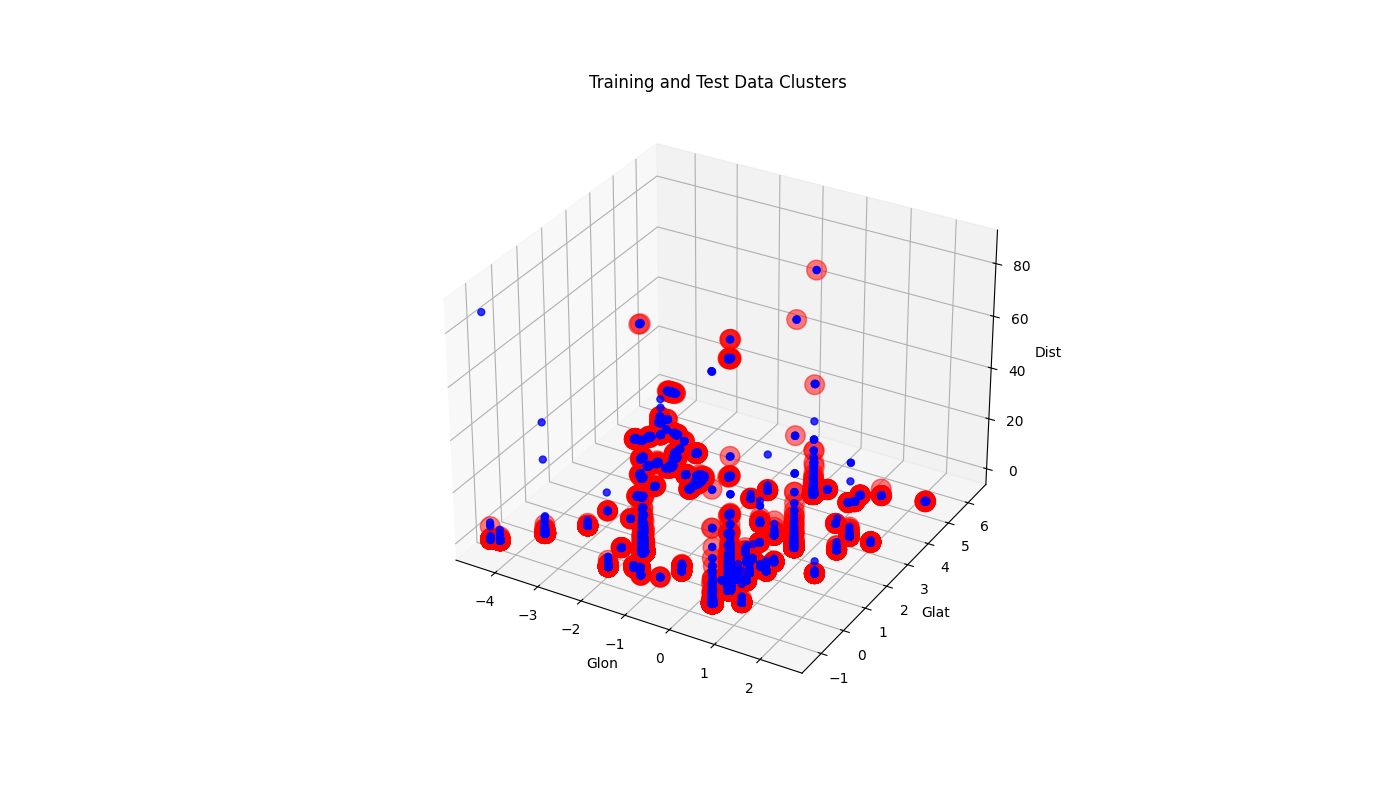

Within-cluster sum of squares (inertia) for training data: 4361508.383125198


In [15]:
import matplotlib.pyplot as plt

# Configurar el tema de seaborn

fig2 = plt.figure(figsize=(14, 8))
ax2 = fig2.add_subplot(111, projection='3d')

# Añadir las etiquetas de cluster al dataframe
X_train_glon_glat.loc[:, 'Cluster'] = y_predict_train
X_test_glon_glat.loc[:, 'Cluster'] = y_predict_test

#'_RAJ2000','_DEJ2000','Dist'
# Plotear los clusters para los datos de entrenamiento
ax2.scatter(X_train_glon_glat['_RAJ2000'],X_train_glon_glat['_DEJ2000'],X_train_glon_glat['Dist']
            , data=X_train_glon_glat,cmap='plasma', alpha=0.8, s=25,c="blue")

# Plotear los clusters para los datos de prueba
ax2.scatter(X_test_glon_glat['_RAJ2000'],X_test_glon_glat['_DEJ2000'],X_test_glon_glat['Dist']
            , data=X_test_glon_glat,cmap='plasma', alpha=0.5, s=200,c="red")

#############################################################



# Añadir etiquetas y título
ax2.set_title('Training and Test Data Clusters')
ax2.set_xlabel('Glon')
ax2.set_ylabel('Glat')
ax2.set_zlabel('Dist')


# Mostrar el gráfico
plt.show()

# Evaluar el rendimiento del clustering usando inertia
train_inertia = model.inertia_
print(f'Within-cluster sum of squares (inertia) for training data: {train_inertia}')

-----------

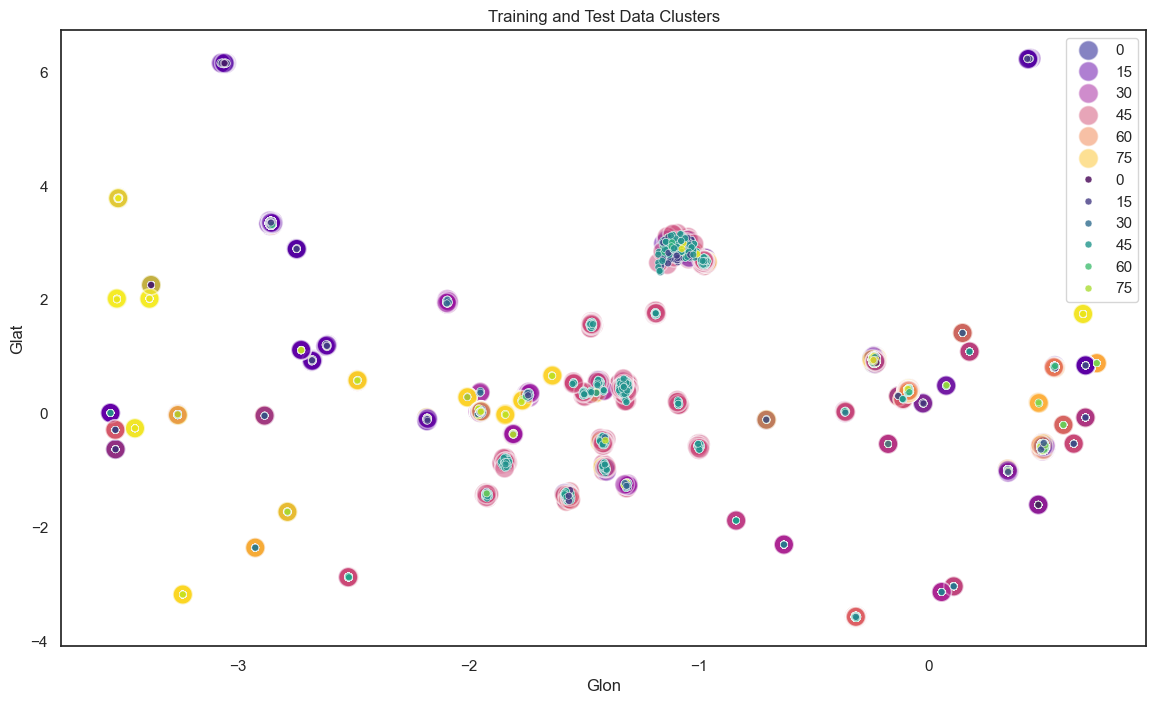

Within-cluster sum of squares (inertia) for training data: 4361508.383125198


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tema de seaborn
sns.set_theme(style="white")
#fig2 = plt.figure()
#ax2 = fig2.add_subplot(111, projection='3d')

# Añadir las etiquetas de cluster al dataframe
X_train_glon_glat.loc[:, 'Cluster'] = y_predict_train
X_test_glon_glat.loc[:, 'Cluster'] = y_predict_test

# Crear el gráfico
plt.figure(figsize=(14, 8))

#'_RAJ2000','_DEJ2000','Dist'
# Plotear los clusters para los datos de prueba
#ax2.scatter(x=X_test_glon_glat['_RAJ2000'], y=X_test_glon_glat['_DEJ2000'],s=X_test_glon_glat['Dist']
#            ,hue='Cluster', data=X_test_glon_glat,palette='plasma', alpha=0.5, s=200)
sns.scatterplot(x='_Glon', y='_Glat', hue='Cluster', data=X_test_glon_glat,palette='plasma', alpha=0.5, s=200)
#############################################################
# Plotear los clusters para los datos de entrenamiento
#ax2.scatter(x=X_train_glon_glat['_RAJ2000'], y=X_train_glon_glat['_DEJ2000'],s=X_train_glon_glat['Dist']
#            ,hue='Cluster', data=X_train_glon_glat,palette='plasma', alpha=0.8, s=25)
sns.scatterplot(x='_Glon', y='_Glat', hue='Cluster', data=X_train_glon_glat,palette='viridis', alpha=0.8, s=25)


# Añadir etiquetas y título
plt.title('Training and Test Data Clusters')
plt.xlabel('Glon')
plt.ylabel('Glat')

# Mostrar la leyenda
plt.legend(labels=['Training Data', 'Test Data'], loc='upper right')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

# Evaluar el rendimiento del clustering usando inertia
train_inertia = model.inertia_
print(f'Within-cluster sum of squares (inertia) for training data: {train_inertia}')

-----------------------

C:\Users\milser\AppData\Local\Temp\ipykernel_21076\2638804637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_glon_glat['Cluster'] = train_clusters
C:\Users\milser\AppData\Local\Temp\ipykernel_21076\2638804637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_glon_glat['Cluster'] = test_clusters


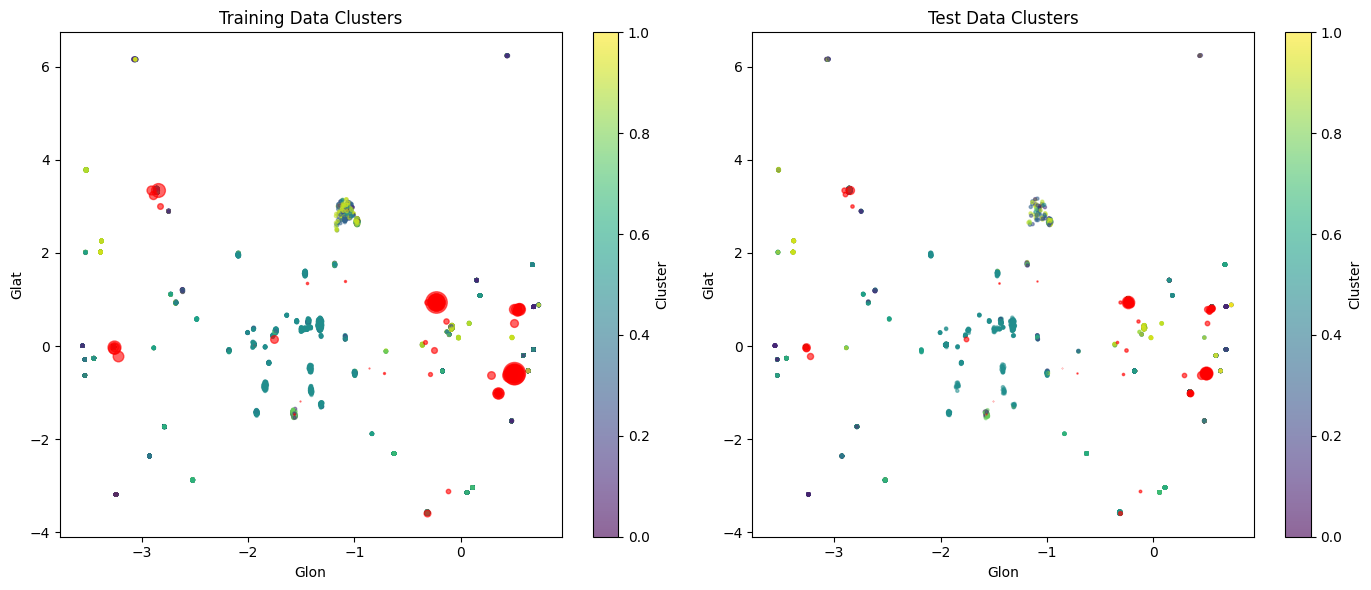

In [36]:
# Asegúrate de que las columnas "Glon" y "Glat" están en tu dataset
assert '_Glon' in X_train.columns, "La columna 'Glon' no está en el dataset de entrenamiento"
assert '_Glat' in X_train.columns, "La columna 'Glat' no está en el dataset de entrenamiento"

# Añadir las etiquetas de cluster al dataframe
X_train_glon_glat['Cluster'] = y_predict_train
X_test_glon_glat['Cluster'] = y_predict_test

# Contar el número de elementos en cada cluster
train_cluster_counts = X_train_glon_glat['Cluster'].value_counts().sort_index()/1000
test_cluster_counts = X_test_glon_glat['Cluster'].value_counts().sort_index()/1000

# Obtener los centroides de los clusters para los datos de entrenamiento
train_centroids = model.cluster_centers_

# Crear el gráfico de burbujas para los datos de entrenamiento
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_glon_glat['_Glon'], X_train_glon_glat['_Glat'], c=y_predict_train, cmap='viridis', s=5, alpha=0.5)
# Ajustar el tamaño de las burbujas proporcional al número de elementos en cada cluster
for cluster, count in train_cluster_counts.items():
    plt.scatter(train_centroids[cluster, 0], train_centroids[cluster, 1], s=count * 10, color='red', alpha=0.6)
plt.title('Training Data Clusters')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.colorbar(label='Cluster')

# Crear el gráfico de burbujas para los datos de prueba
plt.subplot(1, 2, 2)
plt.scatter(X_test_glon_glat['_Glon'], X_test_glon_glat['_Glat'], c=y_predict_test, cmap='viridis', s=5, alpha=0.5)
# Ajustar el tamaño de las burbujas proporcional al número de elementos en cada cluster
for cluster, count in test_cluster_counts.items():
    plt.scatter(train_centroids[cluster, 0], train_centroids[cluster, 1], s=count * 10, color='red', alpha=0.6)
plt.title('Test Data Clusters')
plt.xlabel('Glon')
plt.ylabel('Glat')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()
